This notebook involves analysis of reach of an instagram account.

In [1]:
# import dataset
import pandas as pd

df = pd.read_csv("Instagram.csv", encoding= "latin1")
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


check for missing values

In [2]:
df.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [3]:
# get index of each missing value
import numpy as np


for column in df:
    if df[column].isnull().any():
        print(f'{column}: {np.where(df[column].isnull())[0]}')


Impressions: [99]
From Home: [99]
From Hashtags: [99]
From Explore: [99]
From Other: [99]
Saves: [99]
Comments: [99]
Shares: [99]
Likes: [99]
Profile Visits: [99]
Follows: [99]
Caption: [99]
Hashtags: [99]


missing values seem to be in the same index hence can be dealt with by dropping them

In [4]:
df1 = df.dropna()

In [5]:
df1.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

null values removed

In [6]:
df1.dtypes

Impressions       float64
From Home         float64
From Hashtags     float64
From Explore      float64
From Other        float64
Saves             float64
Comments          float64
Shares            float64
Likes             float64
Profile Visits    float64
Follows           float64
Caption            object
Hashtags           object
dtype: object

In [7]:
df1.shape

(99, 13)

In [8]:
df.shape

(100, 13)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


interest is to see reach of various instagram posts

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


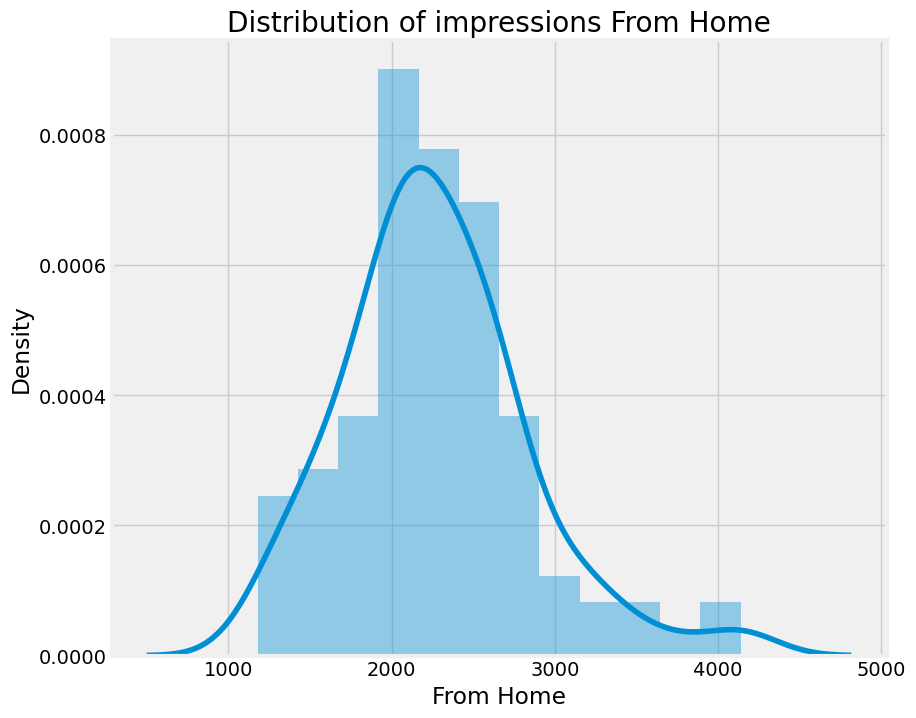

In [11]:
plt.figure(figsize= (10, 8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of impressions From Home")
sn.distplot(df1["From Home"])
plt.show()


distribution receuved from hashtags

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


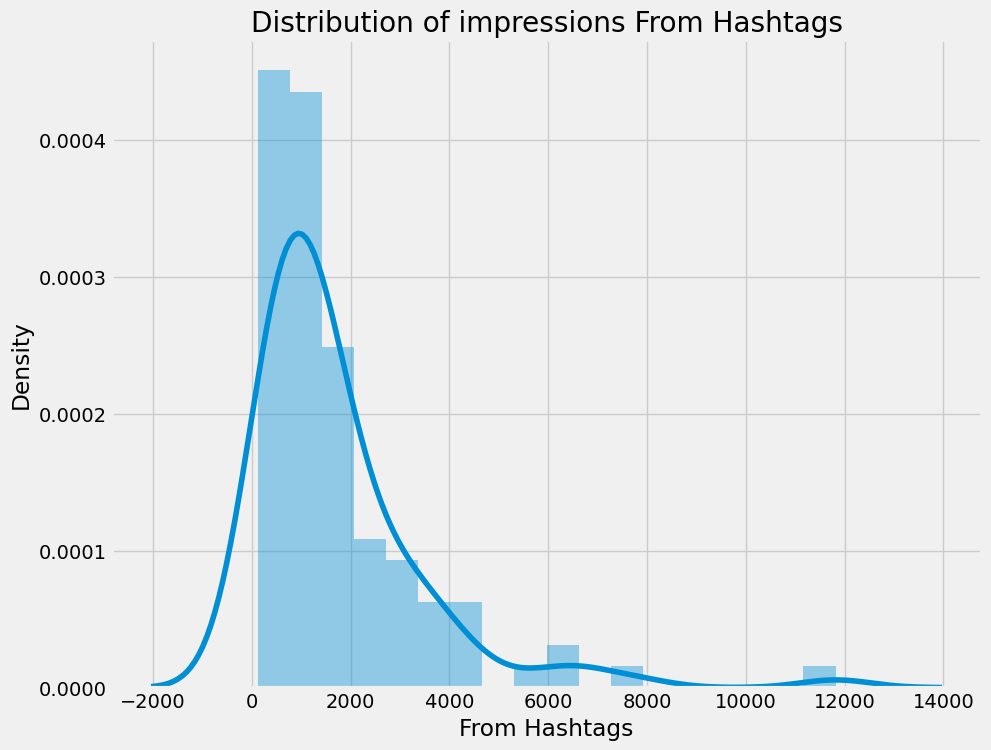

In [12]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of impressions From Hashtags")
sn.distplot(df1["From Hashtags"])
plt.show()

distribution of impressions received from the explore section of Instagram

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


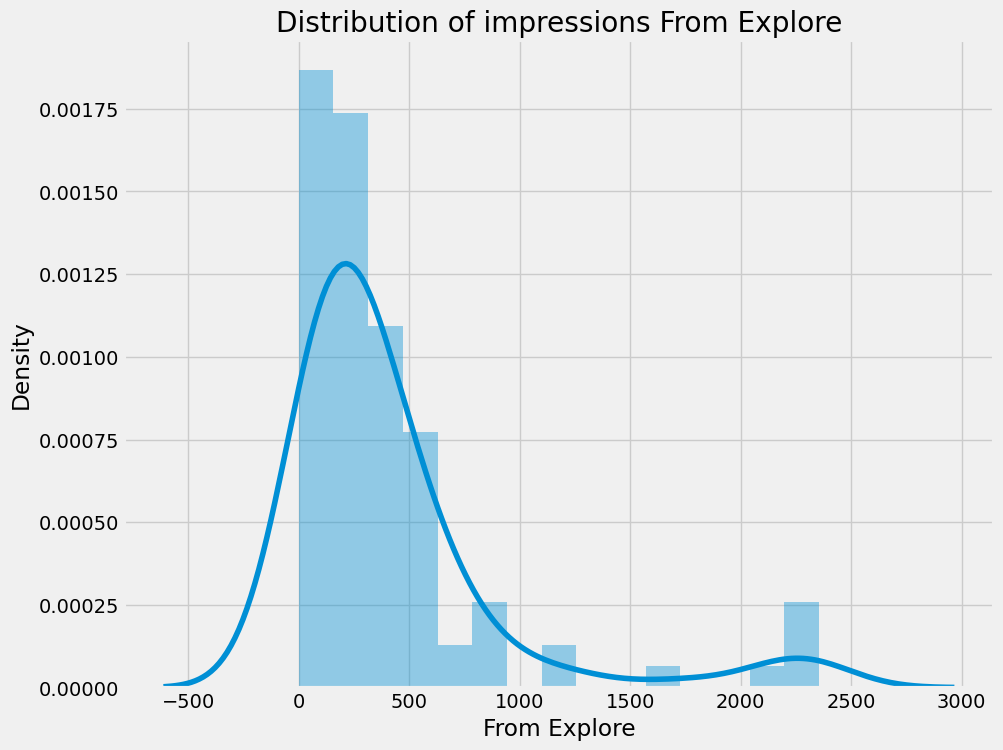

In [13]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of impressions From Explore")
sn.distplot(df1["From Explore"])
plt.show()

In [14]:
import plotly.express as px

# for plotting a pie chart/doughnut

having a look at percentage of impressions from various instagram sources

In [15]:
home = df1['From Home'].sum()
hashtags = df1['From Hashtags'].sum()
explore = df1['From Explore'].sum()
other = df1['From Other'].sum()

label = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]


fig = px.pie(df1, values= values, names= label, title= 'Impression on INstagram Posts From Various Sources', hole= 0.5)

fig.show()

almost 50 per cent of the reach is from followers, 38.1 per cent is from hashtags, 9.14 per cent is from the explore section, and 3.01 per cent is from other sources.

trying to understand kind of content posted on instagrm

create a word cloud of the hashtags columns

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

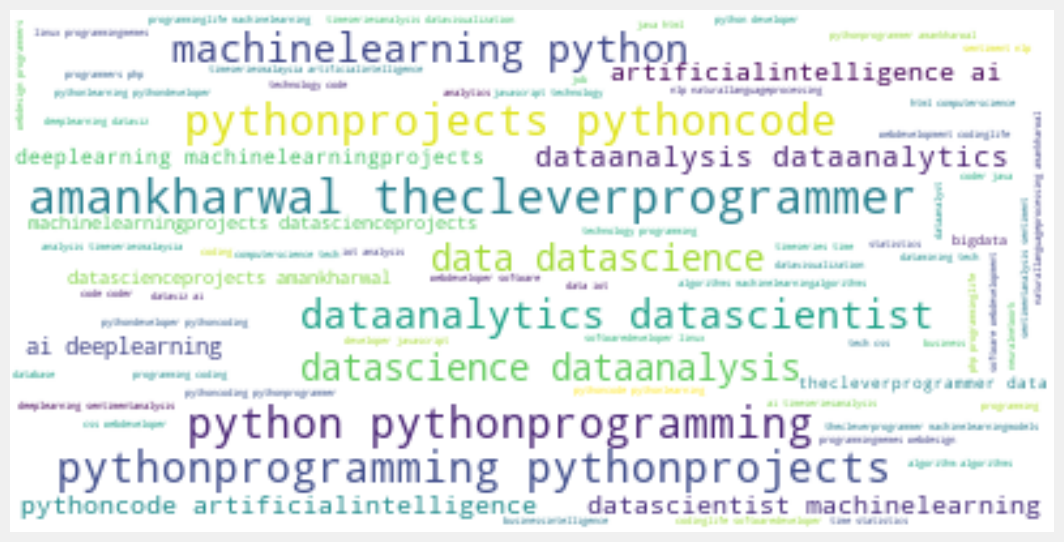

In [17]:
text = " ".join(i for i in df1.Hashtags)
sw = set(STOPWORDS)
wc = WordCloud(stopwords= sw, background_color= "white").generate(text)
plt.figure(figsize= (12,10))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

create a word cloud of the caption columns

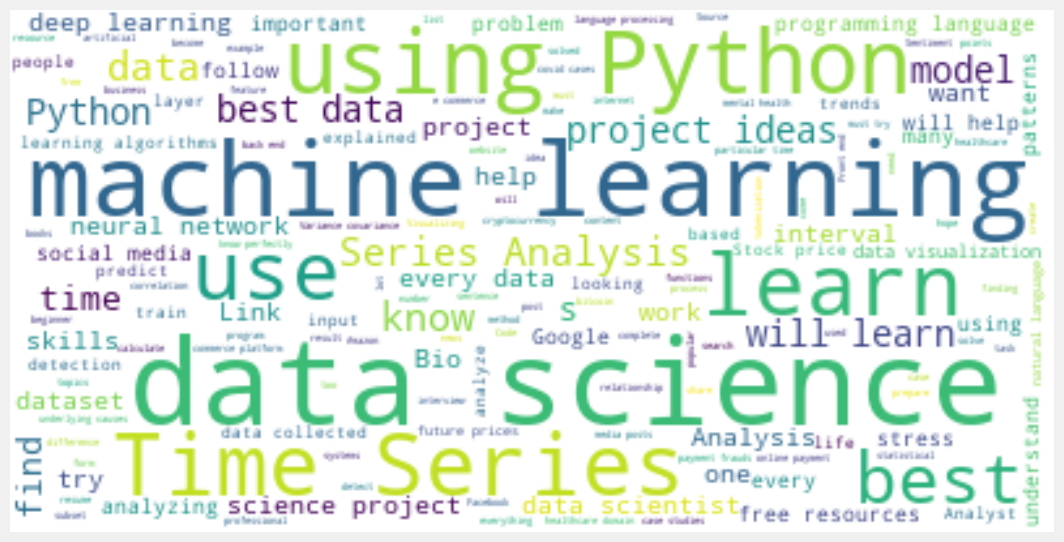

In [18]:
text = " ".join(i for i in df1.Caption)
sw = set(STOPWORDS)
wc = WordCloud(stopwords= sw, background_color= "white").generate(text)
plt.figure(figsize= (12,10))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

 relationship between the number of likes and the number of impressions

In [19]:
import numpy as np

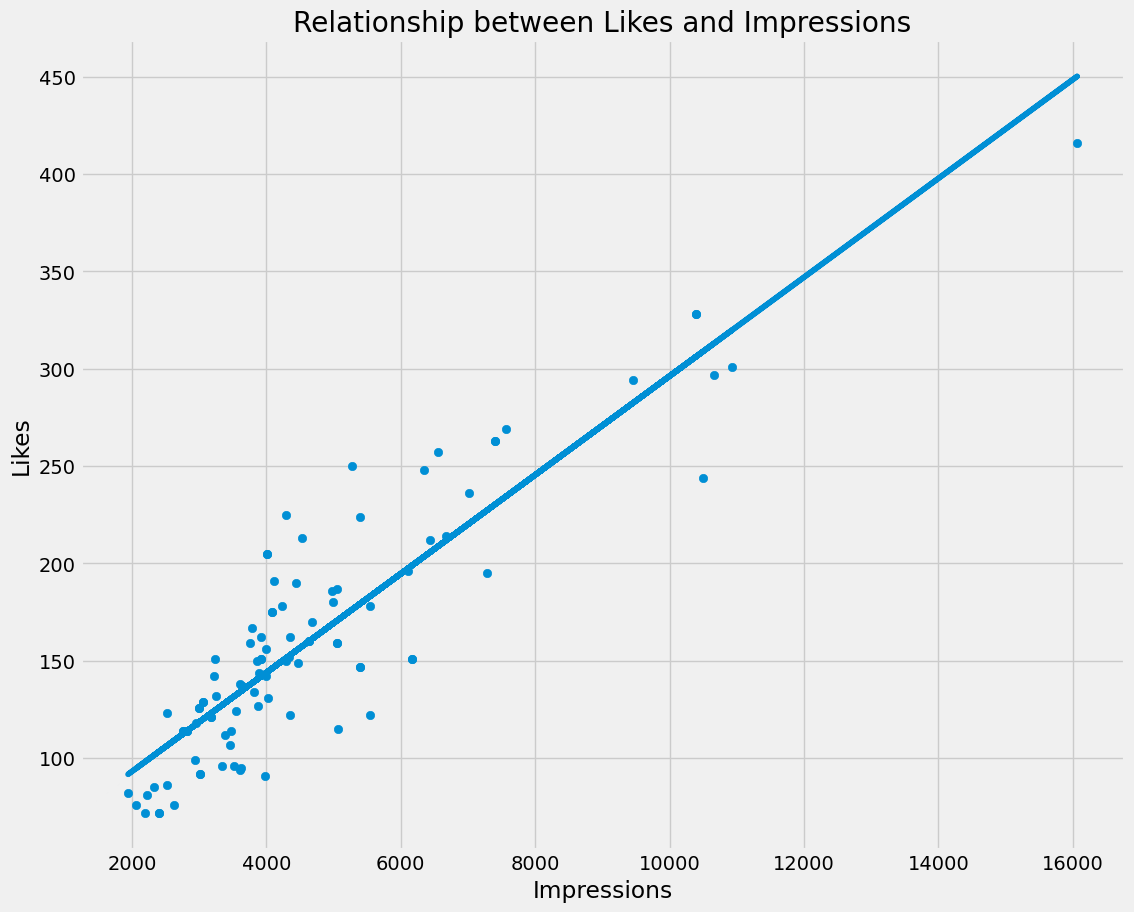

In [20]:
# use a scatter plot using matplotlib
plt.figure(figsize= (12,10))
plt.xlabel("Impressions")
plt.ylabel("Likes")
plt.title("Relationship between Likes and Impressions")
plt.scatter(df1.Impressions, df1.Likes)
# add trendline
z = np.polyfit(df1.Impressions, df1.Likes, 1)
p = np.poly1d(z)
plt.plot(df1.Impressions, p(df1.Impressions))
plt.show()

In [21]:
# using plotly
fig = px.scatter(data_frame = df1, x= "Impressions", y= "Likes", trendline= "ols", title= "Relationship between Likes and Impressions")
fig.show()

 relationship between the number of likes and the number of comments

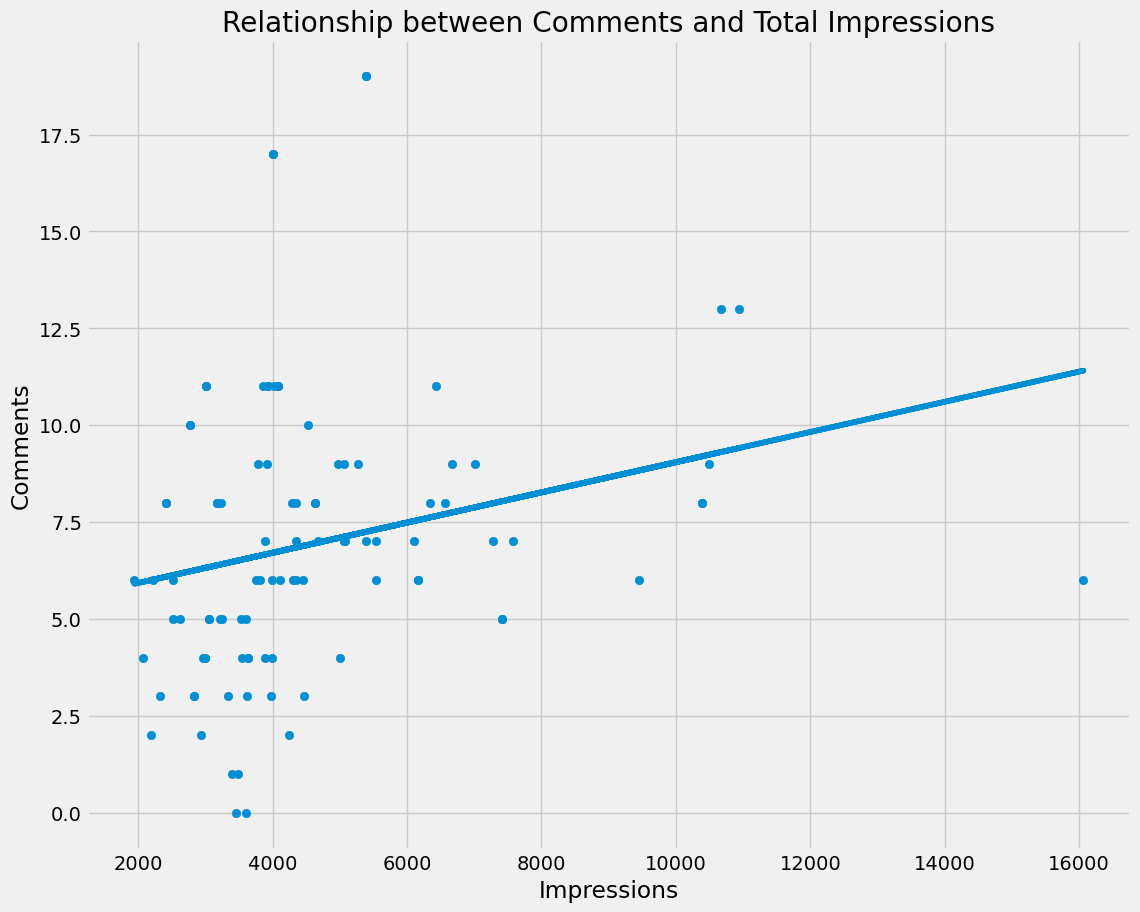

In [22]:
# using matplotlib for a scatter plot
plt.figure(figsize= (12,10))
plt.xlabel("Impressions")
plt.ylabel("Comments")
plt.title("Relationship between Comments and Total Impressions")
plt.scatter(df1.Impressions, df1.Comments)
# add trendline
z = np.polyfit(df1.Impressions, df1.Comments, 1)
p = np.poly1d(z)
plt.plot(df1.Impressions, p(df1.Impressions))
plt.show()

In [23]:
# using plotly
fig = px.scatter(data_frame = df1, x= "Impressions", y= "Comments", trendline= "ols", title= "Relationship between Comments and Total Impressions")
fig.show()

relationship between number of shares and number of impressions

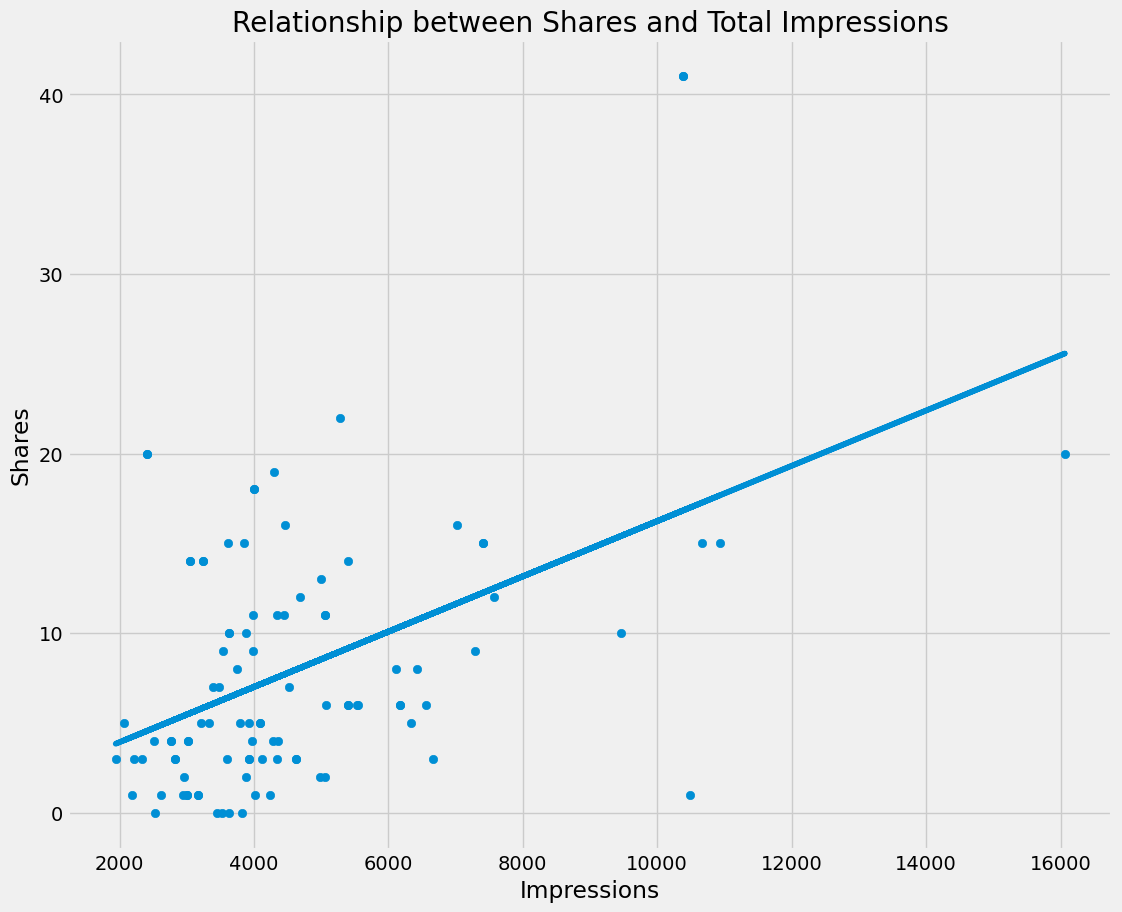

In [24]:
# using matplotlib for a scatter plot
plt.figure(figsize= (12,10))
plt.xlabel("Impressions")
plt.ylabel("Shares")
plt.title("Relationship between Shares and Total Impressions")
plt.scatter(df1.Impressions, df1.Shares)
# add trendline
z = np.polyfit(df1.Impressions, df1.Shares, 1)
p = np.poly1d(z)
plt.plot(df1.Impressions, p(df1.Impressions))
plt.show()

In [25]:
# using plotly
fig = px.scatter(data_frame = df1, x= "Impressions", y= "Shares", trendline= "ols", title= "Relationship between Shares and Total Impressions")
fig.show()

relationship between the number of saves and the number of impressions

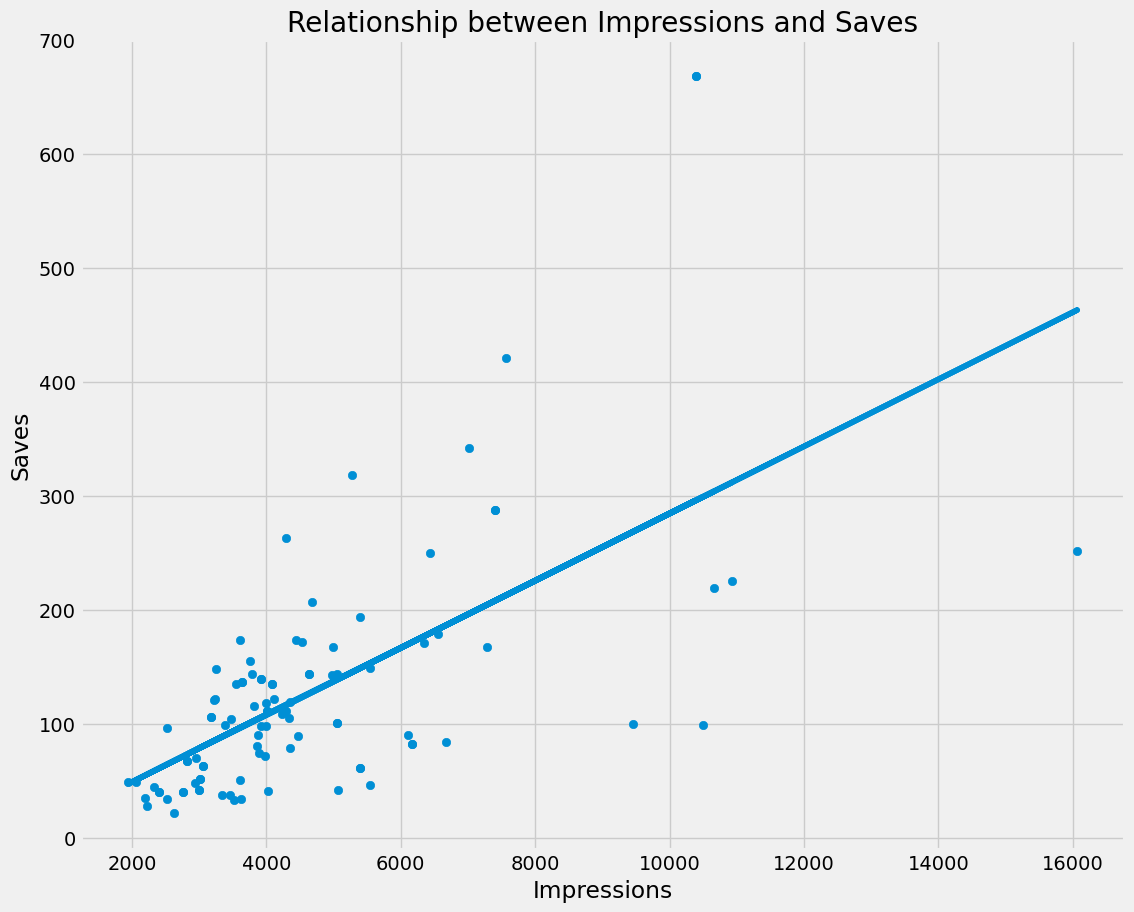

In [26]:
# using matplotlib for a scatter plot
plt.figure(figsize= (12,10))
plt.xlabel("Impressions")
plt.ylabel("Saves")
plt.title("Relationship between Impressions and Saves")
plt.scatter(df1.Impressions, df1.Saves)
# add trendline
z = np.polyfit(df1.Impressions, df1.Saves, 1)
p = np.poly1d(z)
plt.plot(df1.Impressions, p(df1.Impressions))
plt.show()

In [27]:
# using plotly
fig = px.scatter(data_frame = df1, x= "Likes", y= "Shares", trendline= "ols", title= "Relationship between Impressions and Saves")
fig.show()

correlation between all columns and impressions column

In [28]:

correlation = df1.corr()
print(correlation["Impressions"].sort_values(ascending= False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


Impressions, Likes, From Hashtags, Follows, Profile visits, Saves, From Home have a high correlation with Impressions. This means that they greatly influence Impressions.

# Conversion Rate

conversation rate means how many followers you are getting from the number of profile visits from a post
(Follows/Profile Visits) * 100.


In [29]:
CR = (df1.Follows.sum() / df1["Profile Visits"].sum()) * 100
CR

31.17770767613039

elationship between the total profile visits and the number of followers gained from all profile visits

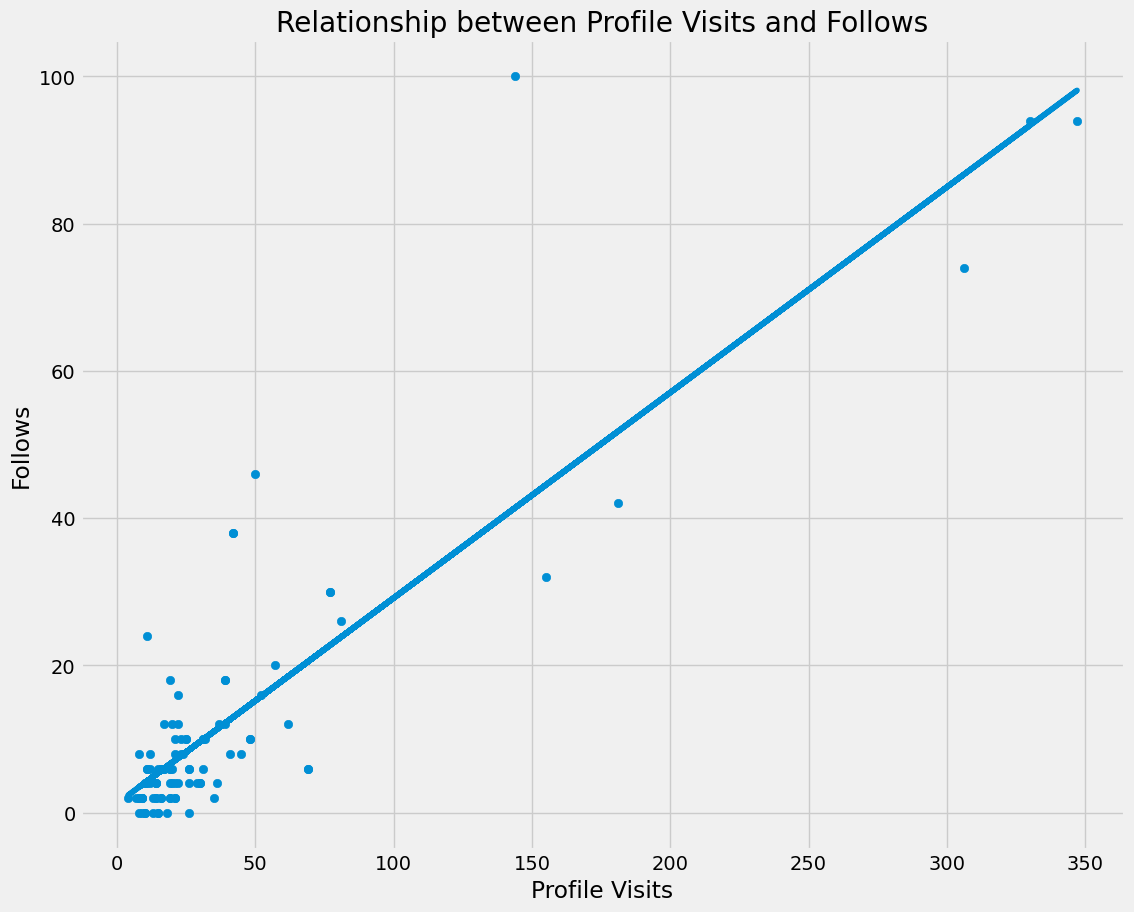

In [30]:
# using matplotlib for a scatter plot
plt.figure(figsize= (12,10))
plt.xlabel("Profile Visits")
plt.ylabel("Follows")
plt.title("Relationship between Profile Visits and Follows")
plt.scatter(df1['Profile Visits'], df1.Follows)
# add trendline
z = np.polyfit(df1['Profile Visits'], df1.Follows, 1)
p = np.poly1d(z)
plt.plot(df1['Profile Visits'], p(df1['Profile Visits']))
plt.show()

In [31]:
# using plotly
fig = px.scatter(data_frame = df1, x= "Profile Visits", y= "Follows", trendline= "ols", title= "Relationship between Profile Visits and Follows")
fig.show()

Reach Prediction Model

From domain knowledge, likes, saves, commments, profile visits, shares and follows are known to greatly influence impressiions. Hence the ML model will be based on these variables as the independent variables(X)

In [32]:
df1.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [33]:
# train test split
X = df1.drop(["From Home", "From Hashtags", "From Other", "From Explore", "Impressions", "Caption", "Hashtags"], axis= 1)
y = df1.Impressions


In [34]:
X.columns

Index(['Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows'], dtype='object')

In [35]:
X.head()

,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,98.0,9.0,5.0,162.0,35.0,2.0
1,194.0,7.0,14.0,224.0,48.0,10.0
2,41.0,11.0,1.0,131.0,62.0,12.0
3,172.0,10.0,7.0,213.0,23.0,8.0
4,96.0,5.0,4.0,123.0,8.0,0.0


In [36]:
X.dtypes

Saves             float64
Comments          float64
Shares            float64
Likes             float64
Profile Visits    float64
Follows           float64
dtype: object

In [37]:
y.head()

0    3920.0
1    5394.0
2    4021.0
3    4528.0
4    2518.0
Name: Impressions, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
X_train.head()

,Saves,Comments,Shares,Likes,Profile Visits,Follows
94,135.0,11.0,5.0,175.0,19.0,6.0
70,104.0,1.0,7.0,114.0,16.0,6.0
50,42.0,4.0,1.0,126.0,31.0,10.0
44,144.0,9.0,5.0,167.0,19.0,4.0
76,99.0,9.0,1.0,244.0,155.0,32.0


In [41]:
X_test.shape

(20, 6)

In [57]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import GridSearchCV
from sklearnex.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearnex.linear_model import LogisticRegression
from sklearnex.neighbors import KNeighborsRegressor
from sklearnex.ensemble import RandomForestRegressor
from sklearnex.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearnex.linear_model import Ridge
from sklearnex.svm import SVC

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [47]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import ShuffleSplit
# from sklearn.linear_model import PassiveAggressiveRegressor
# from sklearn.linear_model import Ridge
# from sklearn.svm import SVC

In [62]:
# evaluate the best classifier using a function
# hyper parameter tuning

def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
        'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [0.001, 0.01, 0.1, 1, 10],
            'selection': ['random', 'cyclic']
        }
    },
    'PassiveAggressiveRegressor': {
        'model': PassiveAggressiveRegressor(),
        'params':{
                'C' : np.logspace(-4, 4, 20),
                'fit_intercept': [True, False],
                'early_stopping': [True, False],
                'shuffle': [True, False],
                'epsilon': np.logspace(-4, 4, 20),
                'warm_start': [True, False],
                'average': [True, False]
        }
    },# dt classifier
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'XGBoost': {
          'model': XGBRegressor(),
          'params': {
              'booster': ["gbtree", "gblinear", "dart"],
              'min_child_weight': [1, 2, 3, 4, 5],
              'gamma': [0, 0.1, 0.2, 0.3, 0.4],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
              'max_depth': [3, 5]
            }
       },
       'LogisticRegression' : {
           'model' : LogisticRegression(),
           'params': {
               'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }
       },
      
       'RandomForestRegressor' : {
           'model' : RandomForestRegressor(),
           'params' : {
               'n_estimators': [10, 50, 100, 200, 500],
               'max_features' : ['auto', 'sqrt', 'log2'],
               'criterion' : ['squared_error', 'absolute_error', 'poisson']
           }
       },
       'svm': {
        'model': SVC(),
        'params' : {
              'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4, 5],
              'gamma': ['scale', 'auto']
        }  
       },
        'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params':{
            'n_neighbors': [1, 3, 5, 7, 9],
            'weights': ["uniform", "distance"],
            'p':[1,2,3],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    "Ridge Regression":{
        'model': Ridge(),
        'params': {
            'alpha': [1, 10, 100],
            'fit_intercept': [True, False]
        }
    }
    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    result = pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params']) 

    result.to_csv("compare_models.csv", index= False)
    
    return result

In [63]:
find_best_model_using_gridsearchcv(X_train, y_train)

[17:13:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:13:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:13:41] WARNING: C:\Windows\Temp\abs_557yfx

,model,best_score,best_params
0,linear_regression,0.864016,"{'fit_intercept': True, 'normalize': True}"
1,lasso,0.864408,"{'alpha': 10, 'selection': 'random'}"
2,PassiveAggressiveRegressor,0.903396,"{'C': 0.615848211066026, 'average': True, 'ear..."
3,decision_tree,0.736245,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
4,XGBoost,0.861371,"{'booster': 'gbtree', 'gamma': 0.1, 'max_depth..."
5,LogisticRegression,0.325000,"{'C': 0.03359818286283781, 'penalty': 'l2', 's..."
6,RandomForestRegressor,0.806370,"{'criterion': 'squared_error', 'max_features':..."
7,svm,0.325000,"{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'ker..."
8,KNeighborsRegressor,0.780423,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2..."
9,Ridge Regression,0.865614,"{'alpha': 100, 'fit_intercept': True}"


TYHE BEST PERFOMRING CLASSIFIER IS PASSIVE AGRESSIVE REGRESSOR WITH SCORE 0.903396

In [64]:
model = PassiveAggressiveRegressor(C= 0.615848211066026, average= True, early_stopping= True, epsilon= 0.012742749857031334, fit_intercept= True, shuffle= False, warm_start= False)
model.fit(X_train, y_train)

PassiveAggressiveRegressor(C=0.615848211066026, average=True,
                           early_stopping=True, epsilon=0.012742749857031334,
                           shuffle=False)

In [65]:
model.score(X_test, y_test)

0.8099485702026928

we could also use cross validation score to evaluate the model

In [66]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits= 10)
score = cross_val_score(model, X_train, y_train, cv= kf)
score.mean()

0.7768783546803879

In [67]:
y_test

19    2407.0
14    9453.0
43    3880.0
37    3990.0
66    3818.0
3     4528.0
80    4681.0
41    4998.0
38    2191.0
68    5058.0
2     4021.0
1     5394.0
60    5072.0
53    6432.0
88    2826.0
74    6559.0
91    2998.0
26    5394.0
59    3246.0
46    3630.0
Name: Impressions, dtype: float64

In [68]:
# some predicions based on X_test
y_pred = np.round(model.predict(X_test))
y_pred

array([ 1999., 11237.,  3800.,  4139.,  3795.,  5671.,  4523.,  4797.,
        2128.,  5088.,  4597.,  6415.,  3747.,  5440.,  3416.,  6801.,
        3847.,  5062.,  3471.,  3576.])

In [69]:
X.columns

Index(['Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows'], dtype='object')

In [70]:
# try predictions from user input
def predict_imp(Saves, Comments, Shares, Likes, prof_visits, Follows):
    x = np.zeros(len(X.columns))
    x[0] = Saves
    x[1] = Comments
    x[2] = Shares
    x[3] = Likes
    x[4] = prof_visits
    x[5] = Follows

    imp = np.round(model.predict([x])[0])
    
    return imp

In [71]:
predict_imp(233, 620, 9, 282, 165, 54)

11171.0

export our modelto a pickle file

In [72]:
import pickle

with open('insta.pickle', 'wb') as f:
    pickle.dump(model, f)

In [73]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [74]:
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
columns["data_columns"]

['saves', 'comments', 'shares', 'likes', 'profile visits', 'follows']

In [75]:
for col in X.columns:
    print(col.lower())

saves
comments
shares
likes
profile visits
follows


In [76]:
 with open("C:/Users/Administrator/Documents/data science/Projects/Instagram Reach Analysis/artifacts/columns.json", 'r') as f:
        __data_columns = json.load(f)["data_columns"]

move on to build a user interface to predict the reach of ones instagram numbers